In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('unclean_pet_data.csv')

# Drop Target Column (AdoptionLikelihood)
df = df.drop('AdoptionLikelihood', axis=1)

In [4]:
# Fill missing values only for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [5]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical variables

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

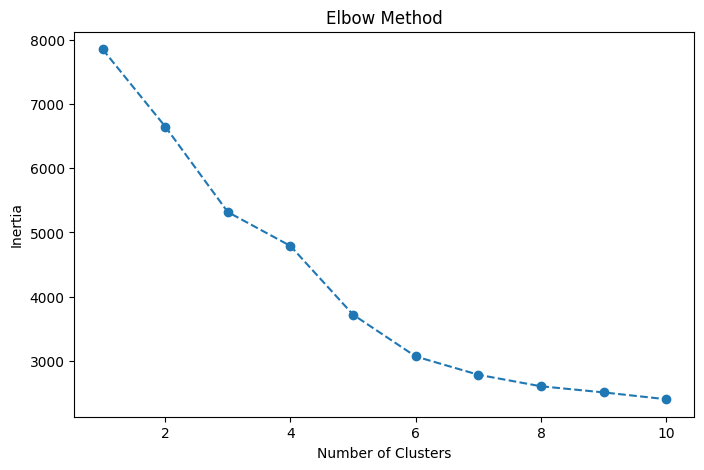

In [7]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters

In [9]:
score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.26


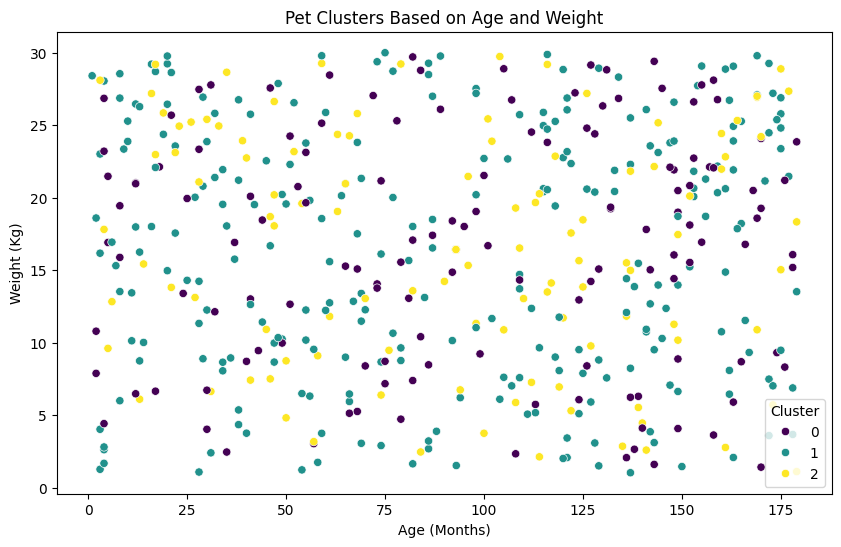

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AgeMonths'], y=df['WeightKg'], hue=df['Cluster'], palette='viridis')
plt.title('Pet Clusters Based on Age and Weight')
plt.xlabel('Age (Months)')
plt.ylabel('Weight (Kg)')
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_4764\718264687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


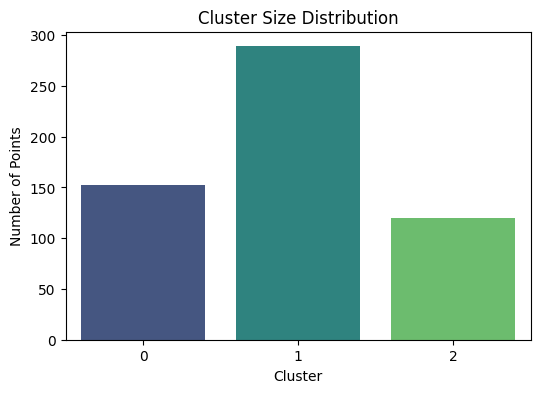

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.show()

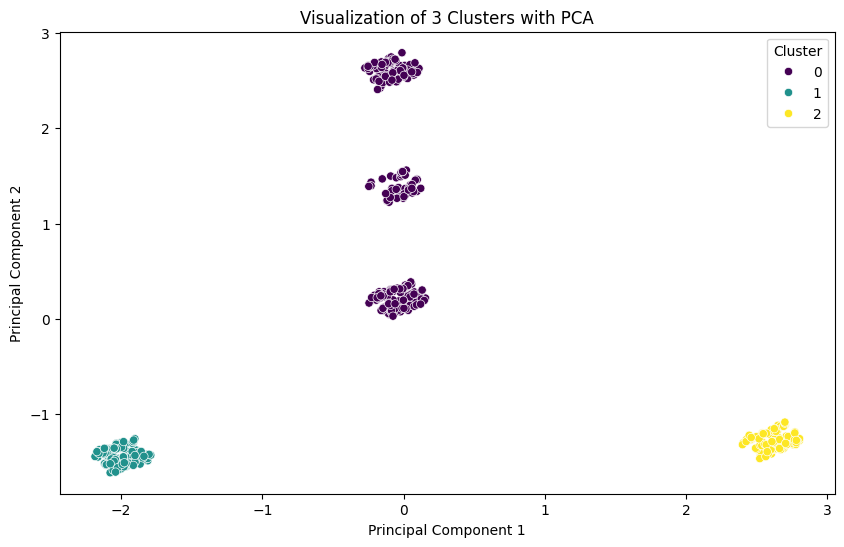

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(df_pca)
df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title(f'Visualization of {best_k} Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [15]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)


Cluster
0    292
1    149
2    120
Name: count, dtype: int64


In [16]:
# Cluster 0 (Size: 292) represents the majority group of pets with average characteristics 
# such as moderate weight, age, and shelter time. These pets likely have average adoption likelihood.
#
# Cluster 1 (Size: 149) is a smaller group, potentially representing pets with higher age or weight, 
# and possibly lower adoption chances or longer shelter stays.
#
# Cluster 2 (Size: 120) consists of the smallest group, likely representing young, lightweight, 
# and highly adoptable pets with shorter shelter stays.
